# Import module

In [27]:
import numpy as np
import pandas as pd 
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 
import seaborn as sns
# import sctk

In [9]:
import session_info
session_info.show()

In [10]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [21]:
sc.settings.set_figure_params(dpi=120,dpi_save=300)

In [24]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

# Read in data

In [14]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/multiome_ATAC/ArchR/project_output/PeakMatrix/Foetal_Peaks_post-peakVI_umap.h5ad')
adata

AnnData object with n_obs × n_vars = 167022 × 508040
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_scvi_batch', '_scvi_labels', 'cluster_pvi'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap'
    obsm: 'X_PeakVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [15]:
adata.obs['fine_grain'].cat.categories

Index(['InnateLymphoidCells', 'AtrialCardiomyocytesLeft',
       'AtrialCardiomyocytesRight', 'AtrialCardiomyocytesCycling',
       'VentricularCardiomyocytesLeftCompact',
       'VentricularCardiomyocytesRightCompact',
       'VentricularCardiomyocytesLeftTrabeculated',
       'VentricularCardiomyocytesRightTrabeculated',
       'VentricularCardiomyocytesCycling', 'SinoatrialNodePacemakerCells',
       'AtrioventriclarNodePacemakerCells',
       'VentricularConductionSystemProximal',
       'VentricularConductionSystemDistal',
       'GreatVesselAdventitialFibroblasts',
       'CoronaryVesselAdventitialFibroblasts',
       'MyocardialInterstitialFibroblasts', 'SubEpicardialFibroblasts',
       'Myofibroblasts', 'LymphNodeFibroblasticReticularCells',
       'ValveInterstitialCells', 'GreatVesselSmoothMuscleCells',
       'CoronarySmoothMuscleCells', 'DuctusArteriosusSmoothMuscleCells',
       'CoronaryPericytes', 'PericardialCellsIntermediate',
       'PericardialCellsFibrous', 'Perica

# Prepare color palette

In [16]:
FineGrainPalette={
    'InnateLymphoidCells':'#72497f', # since want to start the numbering from 1
    
    'AtrialCardiomyocytesLeft':'#eac075',
    'AtrialCardiomyocytesRight':'#4c6b8a',
    'AtrialCardiomyocytesCycling':'#e94bc7',
    'VentricularCardiomyocytesLeftCompact':'#ab1c3c',
    'VentricularCardiomyocytesRightCompact':'#fdba45',
    'VentricularCardiomyocytesLeftTrabeculated':'#2b9200',
    'VentricularCardiomyocytesRightTrabeculated':'#0273a8',
    'VentricularCardiomyocytesCycling':'#e1acff',
    'SinoatrialNodeCardiomyocytes':'#854834',
    'AtrioventricularNodeCardiomyocytes':'#688500',
    'VentricularConductionSystemProximal':'#01ccc8',
    'VentricularConductionSystemDistal':'#b58fab',
    'GreatVesselAdventitialFibroblasts':'#ff7e97',
    'CoronaryVesselAdventitialFibroblasts':'#ff9b6e',
    'MyocardialInterstitialFibroblasts1':'#8a6800',
    'MyocardialInterstitialFibroblasts2':'#206601',
    'Myofibroblasts':'#1bdebf',
    'LymphNodeFibroblasticReticularCells':'#005aa0',
    'ValveInterstitialCells':'#e478ff',
    'GreatVesselSmoothMuscleCells':'#ff665f',
    'CoronarySmoothMuscleCells':'#d2cb18',
    'DuctusArteriosusSmoothMuscleCells':'#83d7b3',
    'CoronaryPericytes':'#9088ff',
    'PericardialCells1':'#c95e00',
    'PericardialCells2':'#01e077',
    'PericardialCells3':'#ff88e4',
    'GreatVesselArterialEndothelialCells':'#d4004b',
    'GreatVesselVenousEndothelialCells':'#8f4300',
    'CoronaryArterialEndothelialCells':'#89da5a',
    'CoronaryVenousEndothelialCells':'#006f86',
    'CoronaryCapillaryEndothelialCells':'#aa7dff',
    'EndocardialCells':'#ff8241',
    'EndocardialCushionCells':'#46603a',
    'ValveEndothelialCells':'#414eb6',
    'LymphaticEndothelialCells':'#8b3f60',
    'MesothelialEpicardialCells':'#0295fe',
    'EpicardiumDerivedCells':'#ff92c4',
    'NeuronPrecursors':'#d30038',
    'ChromaffinCells':'#726800',
    'SympatheticNeurons':'#01894b',
    'ParaympatheticNeurons':'#545191',
    'SchwannCellPrecursors':'#b0d276',
    'SchwannCells':'#b30079',
    'MonocytesMPOpos':'#c50066',
    'Monocytes':'#fab4b6',
    'MonocyteDerivedCells':'#d14008',
    'MacrophagesCX3CR1pos':'#eabe97',
    'MacrophagesTIMD4pos':'#b2a200',
    'MacrophagesLYVE1pos':'#4a6005',
    'MacrophagesATF3pos':'#3db833',
    'DendriticCellsType1':'#007859',
    'DendriticCellsMature':'#01a9db',
    'PlasmacytoidDendriticCells':'#2c54ab',
    'MastCells':'#d0bef2',
    'Megakaryocytes':'#94298f',
    'TCellsCD4pos':'#ff387c',
    'TCellsCD8pos':'#9e3429',
    'TregsCD4pos':'#b37700',
    'ProBCells':'#8dab00',
    'BCells':'#a8d1a1',
    'BCellsMS4A1pos':'#00d2f0',
    'NaturalKillerCells':'#abb4ff',
}

FineGrainPalette_mod = {}
for i,celltype in enumerate(FineGrainPalette.keys()):
    if i < 10:
        celltype_mod = f'  {i}   {celltype}'
    else:
        celltype_mod = f' {i}   {celltype}'
    FineGrainPalette_mod[celltype_mod] = FineGrainPalette[celltype]
    

# Plotting

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


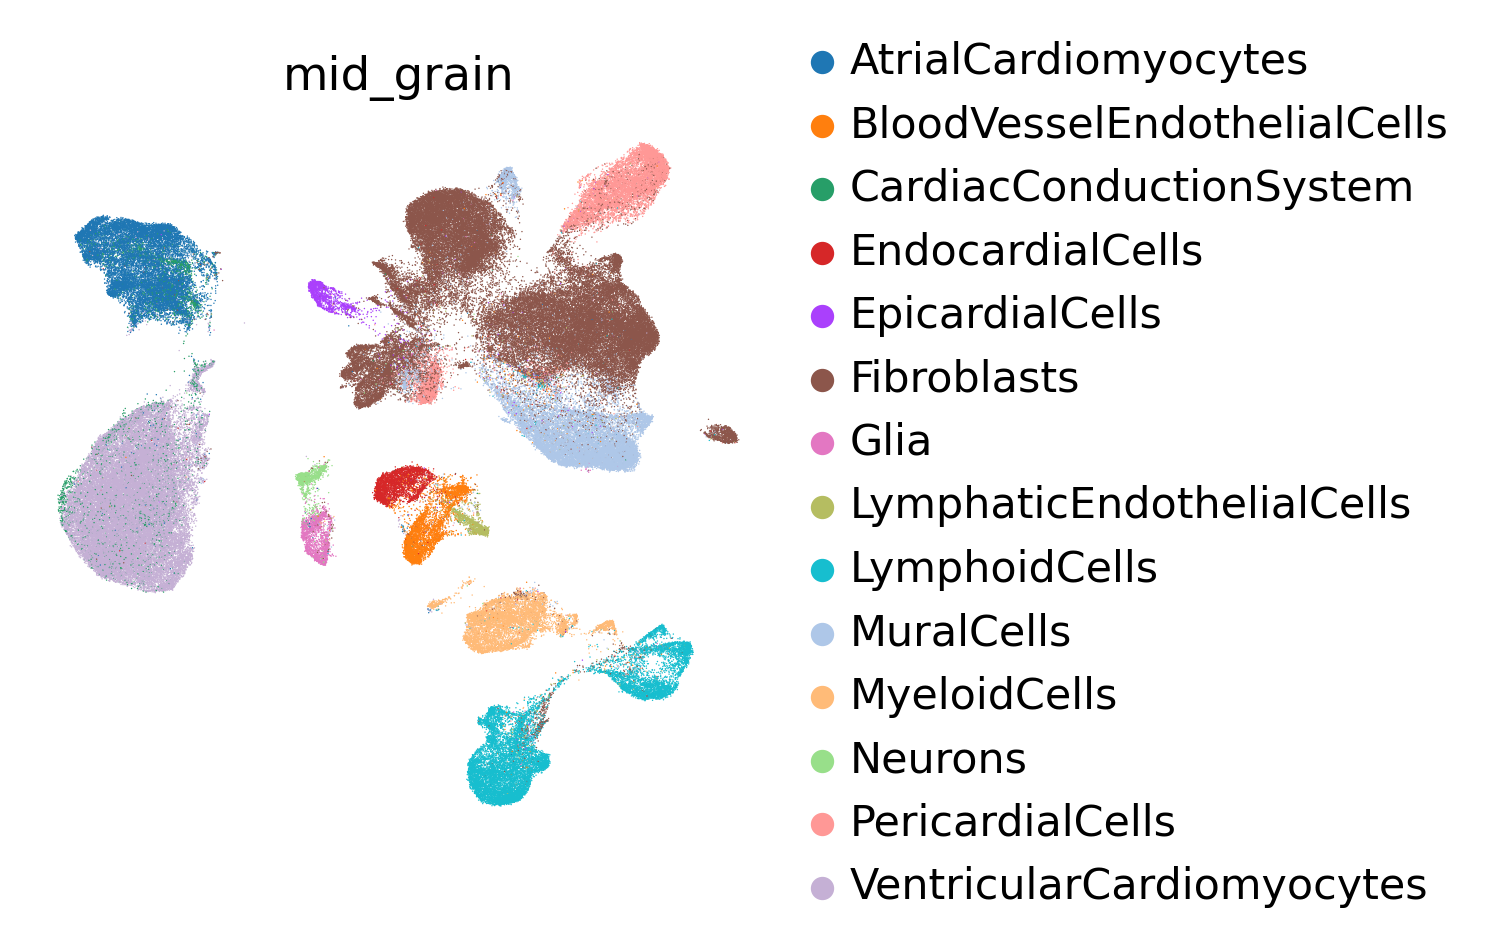

In [22]:
sc.pl.umap(adata, color=['mid_grain'], frameon=False)

/nfs/team205/kk18/miniconda3/envs/vitro/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


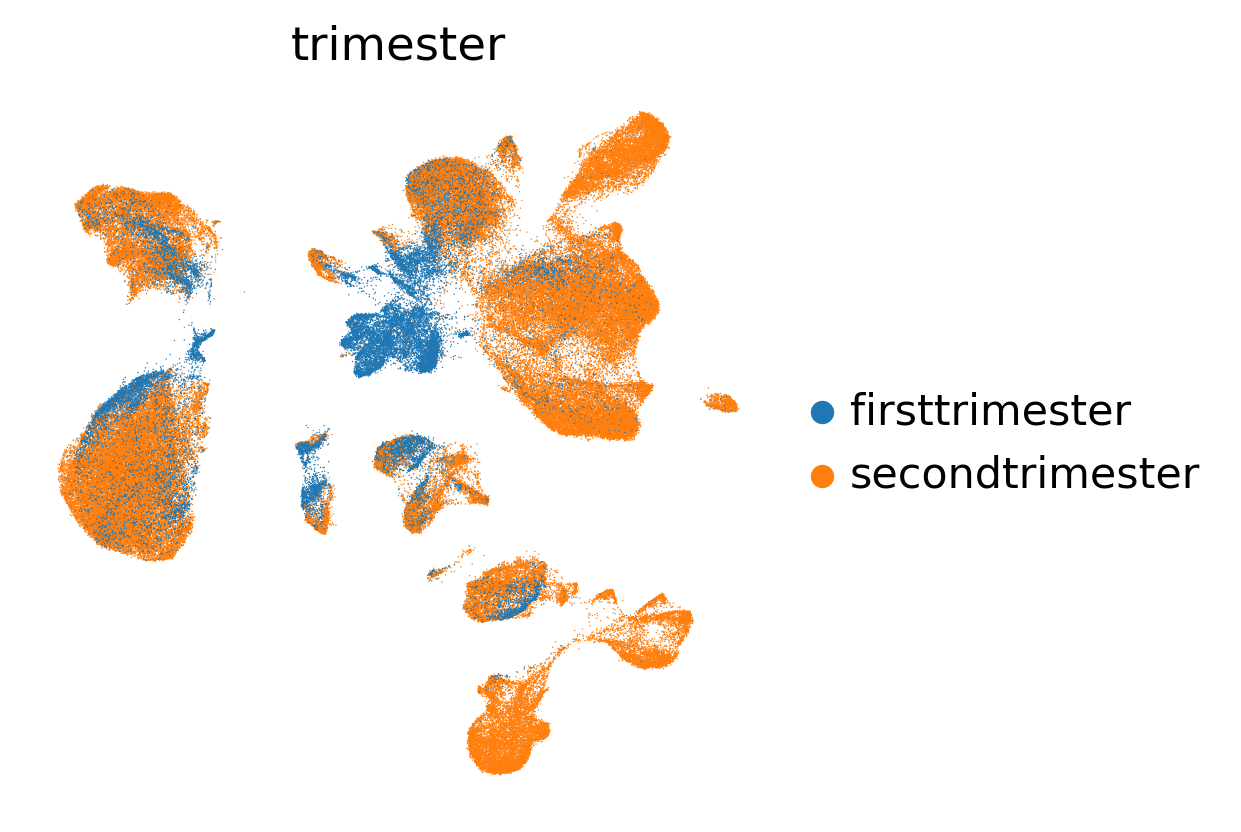

In [28]:
sc.pl.umap(adata, color=['trimester'], frameon=False, show=False)
plt.savefig(f'{figdir}/Peaks_UMAP_trimesters.pdf', bbox_inches="tight",dpi=300)